In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

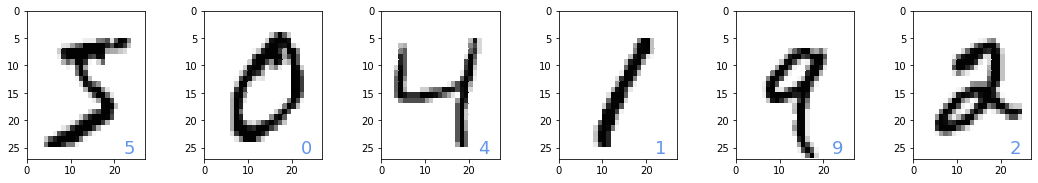

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(18,6))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(6):
    plt.subplot(2,6,id + 1)
    img = x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(22,26,"%d"% y_train[id],color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)

plt.show()

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  # (A)
x_train = x_train.astype('float32')   # (B)
x_train = x_train / 255               # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)


np.random.seed(1)                                         # (A)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()                                      # (B)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (C)
model.add(Dense(10, activation='softmax'))                # (D)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])     # (E)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 1.9728 - accuracy: 0.4520 - val_loss: 1.6728 - val_accuracy: 0.6122
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.5035 - accuracy: 0.6940 - val_loss: 1.3366 - val_accuracy: 0.7685
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2298 - accuracy: 0.7858 - val_loss: 1.1078 - val_accuracy: 0.8200
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0344 - accuracy: 0.8213 - val_loss: 0.9397 - val_accuracy: 0.8444
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8889 - accuracy: 0.8415 - val_loss: 0.8137 - val_accuracy: 0.8603
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7789 - accuracy: 0.8567 - val_loss: 0.7177 - val_accuracy: 0.8721
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.8675 - val_loss: 0.6432 - val_accuracy: 0.8808
Epoch 8/10
60/60 [==

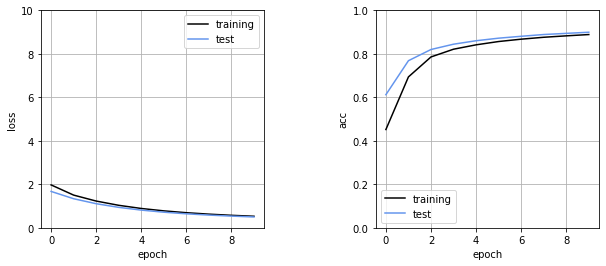

In [4]:
plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
    

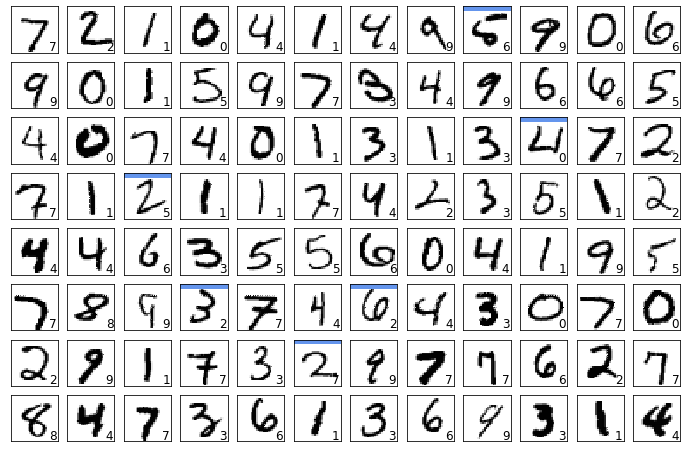

In [5]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i,:]
        x = x.reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5,"%d"% prediction,fontsize=12)
        
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")

# main
show_prediction()
plt.show()


In [6]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train,y_train,batch_size=1000,epochs=10,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print('Computation time:{0:.3f}sec'.format(time.time() - startTime))


Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 1.4605 - accuracy: 0.5939 - val_loss: 0.8799 - val_accuracy: 0.8025
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.8383 - val_loss: 0.5181 - val_accuracy: 0.8745
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.8808 - val_loss: 0.4005 - val_accuracy: 0.8956
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8980 - val_loss: 0.3438 - val_accuracy: 0.9080
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.9067 - val_loss: 0.3125 - val_accuracy: 0.9156
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.9126 - val_loss: 0.2944 - val_accuracy: 0.9177
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.9170 - val_loss: 0.2782 - val_accuracy: 0.9235
Epoch 8/10
60/60 [==

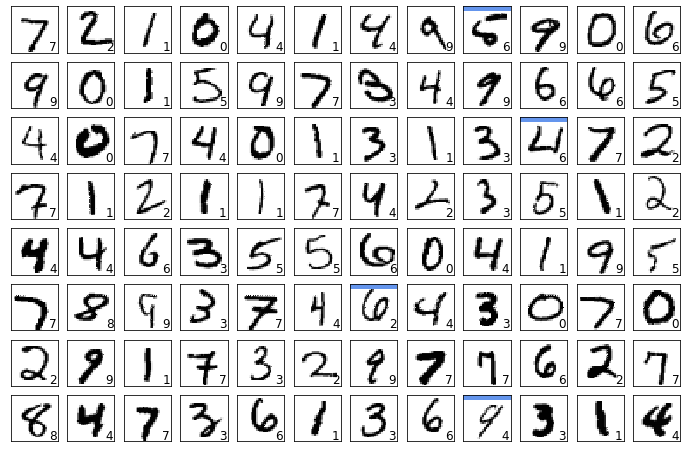

In [7]:
show_prediction()
plt.show()

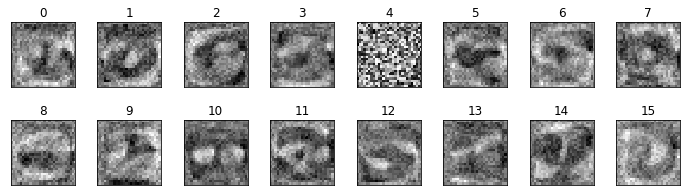

In [8]:
# 1層目の重みの可視化
w = model.layers[0].get_weights()[0]
plt.figure(1,figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)

for i in range(16):
    plt.subplot(2,8,i+1)
    w1 = w[:,i]
    w1 = w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d" % i)

plt.show()


In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


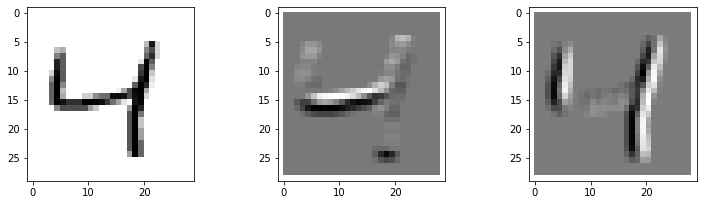

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],[1,1,1],[-2,-2,-2]],dtype=float)
myfil2 = np.array([[-2,1,1],[-2,1,1],[-2,1,1]],dtype=float)

x_img = x_train[id_img,:,:,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# filter
for ih in range(img_h - 3 + 1):
    for iw in range(img_w - 3 + 1 ):
        img_part = x_img[ih:ih + 3,iw:iw + 3]
        out_img1[ih+1,iw+1] = np.dot(img_part.reshape(-1),myfil1.reshape(-1))
        out_img2[ih+1,iw+1] = np.dot(img_part.reshape(-1),myfil2.reshape(-1))

# show
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [12]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
           input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 4s 68ms/step - loss: 0.9195 - accuracy: 0.7844 - val_loss: 0.3624 - val_accuracy: 0.9012
Epoch 2/20
60/60 [==============================] - 4s 70ms/step - loss: 0.3225 - accuracy: 0.9085 - val_loss: 0.2687 - val_accuracy: 0.9233
Epoch 3/20
60/60 [==============================] - 5s 83ms/step - loss: 0.2569 - accuracy: 0.9272 - val_loss: 0.2273 - val_accuracy: 0.9351
Epoch 4/20
60/60 [==============================] - 6s 100ms/step - loss: 0.2150 - accuracy: 0.9398 - val_loss: 0.1931 - val_accuracy: 0.9465
Epoch 5/20
60/60 [==============================] - 7s 110ms/step - loss: 0.1821 - accuracy: 0.9497 - val_loss: 0.1660 - val_accuracy: 0.9552
Epoch 6/20
60/60 [==============================] - 6s 105ms/step - loss: 0.1573 - accuracy: 0.9574 - val_loss: 0.1478 - val_accuracy: 0.9602
Epoch 7/20
60/60 [==============================] - 8s 132ms/step - loss: 0.1379 - accuracy: 0.9628 - val_loss: 0.1352 - val_accuracy: 0.9642
Epoch 8/2

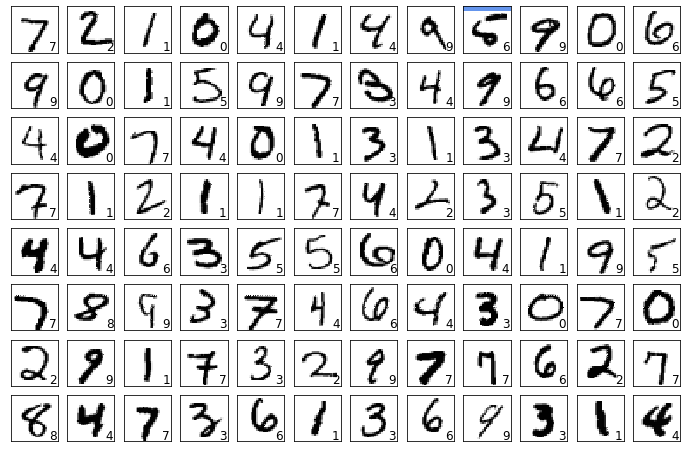

In [13]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)  # (A)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")


show_prediction()
plt.show()

In [14]:
plt.figure(1,figsize=(12,2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2.hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img,:,:,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
plt.pcolor(-x_img)
plt.xlim(0,img_h)
plt.ylim(img_w,0)
plt.xticks([],"")
plt.yticks([],"")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)










SyntaxError: invalid syntax (<ipython-input-14-b99751b91575>, line 3)